In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [228]:
df = pd.read_csv("dataset_educacao_graduacao_brasil_500.csv")

print(df.head())   # mostra as primeiras linhas
print(df.info())   # mostra os tipos de cada coluna


         Regiao Localidade Cidade_Tamanho Tipo_IES  Modalidade     Periodo  \
0           Sul   Interior          Média  Privada  Presencial     Noturno   
1  Centro-Oeste   Interior        Pequena  Privada         EAD  Vespertino   
2       Sudeste   Interior         Grande  Privada     Híbrido    Integral   
3       Sudeste   Interior      Metrópole  Privada  Presencial  Vespertino   
4           Sul    Capital          Média  Privada         EAD    Matutino   

                Area     Genero Cor_Raca  Idade  ...  Nota_ENEM  \
0      Licenciaturas   Feminino    Parda     20  ...        714   
1            Humanas  Masculino   Branca     20  ...        571   
2              Saúde   Feminino    Parda     24  ...        522   
3  Sociais Aplicadas  Masculino    Parda     21  ...        540   
4        Engenharias   Feminino   Branca     17  ...        662   

  Faltas_Percentual   CRA Reprovacoes Engajamento_Plataformas_h_sem  Estagio  \
0              15.3  6.28           0           

In [ ]:
X = df[["Trabalho_Horas_Semanais", "Horas_Estudo_Semanais", "Faltas_Percentual", "Modalidade"]] #Features numéricas que podem ser uteis
y = df["CRA"] #Target


In [230]:
X = pd.get_dummies(X, columns=["Modalidade"], drop_first=True)


In [231]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [232]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),         # padroniza as features
    ("knn", KNeighborsRegressor(n_neighbors=20, metric="euclidean")) # modelo KNN
])


In [233]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [234]:
y_pred = pipeline.predict(X_test)


In [235]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.5861333333333334
MSE: 0.5455959333333333
R²: 0.631862042144907


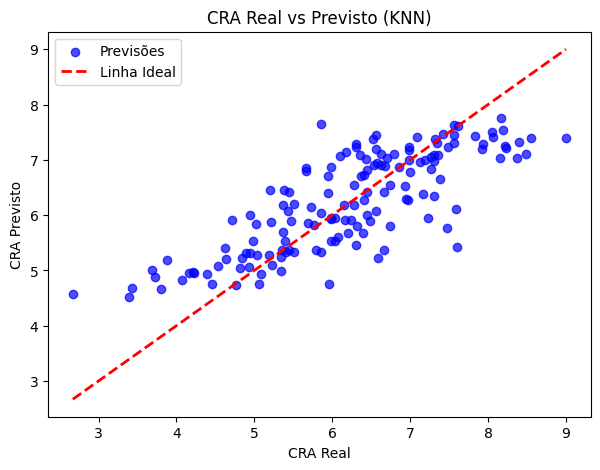

In [236]:
import matplotlib.pyplot as plt

# Gráfico de Dispersão (Reais vs Preditos)
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Previsões")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         "r--", lw=2, label="Linha Ideal")  # Linha onde previsão = real
plt.xlabel("CRA Real")
plt.ylabel("CRA Previsto")
plt.title("CRA Real vs Previsto (KNN)")
plt.legend()
plt.show()


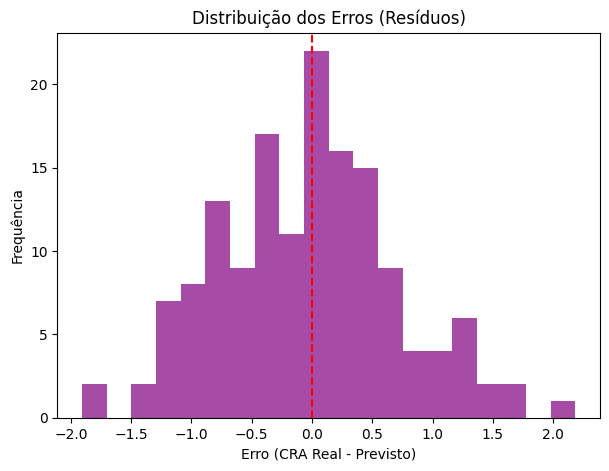

In [237]:
# Erros (resíduos)
erros = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.hist(erros, bins=20, color="purple", alpha=0.7)
plt.xlabel("Erro (CRA Real - Previsto)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros (Resíduos)")
plt.axvline(0, color="red", linestyle="--")  # Linha central (sem erro)
plt.show()


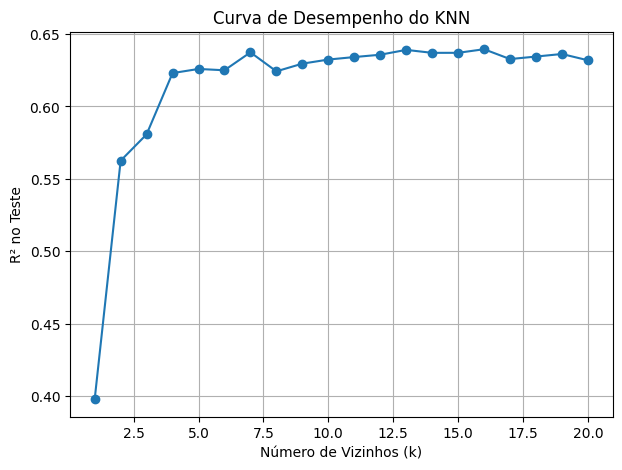

In [238]:
import numpy as np

# Testar diferentes valores de k
ks = range(1, 21)
r2_scores = []

for k in ks:
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=k))
    ])
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_k))

plt.figure(figsize=(7, 5))
plt.plot(ks, r2_scores, marker="o")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("R² no Teste")
plt.title("Curva de Desempenho do KNN")
plt.grid(True)
plt.show()
